# Assignment 1 - The Bean Project

## Task 1

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

df = pd.read_csv('Dry_Bean_Dataset.csv')


In [2]:
X = df.drop(columns=['Class']).values
y = df['Class'].values

df.shape

(13611, 17)

In [3]:
print(f'Duplicate rows:{df.duplicated().sum()}\n')

print('Bean type of duplicated rows:')
print(df[df.duplicated()].Class.value_counts())

df[df.duplicated(keep=False)]

Duplicate rows:68

Bean type of duplicated rows:
HOROZ    68
Name: Class, dtype: int64


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
5504,33518,702.956,277.571399,154.305581,1.798842,0.831240,34023,206.582775,0.808383,0.985157,0.852377,0.744251,0.008281,0.001567,0.553909,0.996396,HOROZ
5505,33518,702.956,277.571399,154.305581,1.798842,0.831240,34023,206.582775,0.808383,0.985157,0.852377,0.744251,0.008281,0.001567,0.553909,0.996396,HOROZ
5508,33954,716.750,277.368480,156.356326,1.773951,0.825970,34420,207.922042,0.799482,0.986461,0.830549,0.749624,0.008169,0.001591,0.561936,0.996847,HOROZ
5509,33954,716.750,277.368480,156.356326,1.773951,0.825970,34420,207.922042,0.799482,0.986461,0.830549,0.749624,0.008169,0.001591,0.561936,0.996847,HOROZ
5547,38427,756.323,306.533886,160.591784,1.908777,0.851782,38773,221.193978,0.796976,0.991076,0.844174,0.721597,0.007977,0.001334,0.520702,0.993905,HOROZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7285,63948,996.497,412.297178,198.877557,2.073121,0.875971,64641,285.343867,0.777909,0.989279,0.809254,0.692083,0.006447,0.000912,0.478979,0.992981,HOROZ
7339,65766,1035.842,406.416622,207.242369,1.961069,0.860218,66698,289.371512,0.792295,0.986027,0.770237,0.712007,0.006180,0.000980,0.506954,0.994172,HOROZ
7340,65766,1035.842,406.416622,207.242369,1.961069,0.860218,66698,289.371512,0.792295,0.986027,0.770237,0.712007,0.006180,0.000980,0.506954,0.994172,HOROZ
7341,65781,1039.257,409.713859,204.992832,1.998674,0.865834,66762,289.404510,0.642549,0.985306,0.765358,0.706358,0.006228,0.000956,0.498941,0.997221,HOROZ


In [4]:
df=df.drop_duplicates()
df.shape

(13543, 17)

In [5]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13543 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13543 non-null  int64  
 1   Perimeter        13543 non-null  float64
 2   MajorAxisLength  13543 non-null  float64
 3   MinorAxisLength  13543 non-null  float64
 4   AspectRation     13543 non-null  float64
 5   Eccentricity     13543 non-null  float64
 6   ConvexArea       13543 non-null  int64  
 7   EquivDiameter    13543 non-null  float64
 8   Extent           13543 non-null  float64
 9   Solidity         13543 non-null  float64
 10  roundness        13543 non-null  float64
 11  Compactness      13543 non-null  float64
 12  ShapeFactor1     13543 non-null  float64
 13  ShapeFactor2     13543 non-null  float64
 14  ShapeFactor3     13543 non-null  float64
 15  ShapeFactor4     13543 non-null  float64
 16  Class            13543 non-null  object 
dtypes: float64(1

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sc_X_train = StandardScaler()
X_train = sc_X_train.fit_transform(X_train)
X_test = sc_X_train.fit_transform(X_test)

In [8]:
knn = KNeighborsClassifier(n_neighbors=5)
tree = DecisionTreeClassifier()
lr = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier()

knn.fit(X_train, y_train)
tree.fit(X_train, y_train)
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
y_pred_tree = tree.predict(X_test)
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)

In [9]:
cm_knn = confusion_matrix(y_test,y_pred_knn)
cm_tree = confusion_matrix(y_test,y_pred_tree)
cm_lr = confusion_matrix(y_test,y_pred_lr)
cm_rf = confusion_matrix(y_test,y_pred_rf)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

report_knn = classification_report(y_test, y_pred_knn)
report_tree = classification_report(y_test, y_pred_tree)
report_lr = classification_report(y_test, y_pred_lr)
report_rf = classification_report(y_test, y_pred_rf)


In [10]:
print("confusion matrix of k-Nearest Neighbour:")
print(cm_knn)
print("confusion matrix of Decision Tree:")
print(cm_tree)

confusion matrix of k-Nearest Neighbour:
[[235   0  15   0   0   3   8]
 [  0 117   0   0   0   0   0]
 [ 10   0 296   0   7   1   3]
 [  1   0   0 620   1   5  44]
 [  0   0  10   4 386   0   8]
 [  3   0   0  13   0 389   8]
 [  1   0   1  65   4   5 460]]
confusion matrix of Decision Tree:
[[230   0  20   0   2   2   7]
 [  0 117   0   0   0   0   0]
 [ 29   0 277   0   7   1   3]
 [  0   0   0 594   4   8  65]
 [  3   0   8   3 373   0  21]
 [  1   0   0  27   0 376   9]
 [  5   0   4  68   8  13 438]]


In [11]:
print("confusion matrix of Logistic Regression:")
print(cm_lr)
print("confusion matrix of Random Forest:")
print(cm_rf)

confusion matrix of Logistic Regression:
[[236   0  13   0   0   1  11]
 [  0 117   0   0   0   0   0]
 [ 11   0 297   0   4   1   4]
 [  0   0   0 615   1   6  49]
 [  1   0   2   4 391   0  10]
 [  6   0   0   9   0 389   9]
 [  0   0   0  49   7   5 475]]
confusion matrix of Random Forest:
[[234   0  16   0   1   4   6]
 [  0 117   0   0   0   0   0]
 [ 14   0 297   0   4   1   1]
 [  0   0   0 622   1   6  42]
 [  4   0   4   5 387   0   8]
 [  2   0   0  15   0 386  10]
 [  1   0   0  60   4   9 462]]


In [12]:
print(accuracy_knn,accuracy_tree,accuracy_lr,accuracy_rf)

0.9192067572530297 0.8832170400293794 0.9254498714652957 0.9199412412780023


In [13]:
print(report_knn)
print(report_tree)

              precision    recall  f1-score   support

    BARBUNYA       0.94      0.90      0.92       261
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.92      0.93      0.93       317
    DERMASON       0.88      0.92      0.90       671
       HOROZ       0.97      0.95      0.96       408
       SEKER       0.97      0.94      0.95       413
        SIRA       0.87      0.86      0.86       536

    accuracy                           0.92      2723
   macro avg       0.93      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723

              precision    recall  f1-score   support

    BARBUNYA       0.86      0.88      0.87       261
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.90      0.87      0.88       317
    DERMASON       0.86      0.89      0.87       671
       HOROZ       0.95      0.91      0.93       408
       SEKER       0.94      0.91      0.92       413
        SIRA       0.81 

In [14]:
print(report_lr)
print(report_rf)

              precision    recall  f1-score   support

    BARBUNYA       0.93      0.90      0.92       261
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.95      0.94      0.94       317
    DERMASON       0.91      0.92      0.91       671
       HOROZ       0.97      0.96      0.96       408
       SEKER       0.97      0.94      0.95       413
        SIRA       0.85      0.89      0.87       536

    accuracy                           0.93      2723
   macro avg       0.94      0.93      0.94      2723
weighted avg       0.93      0.93      0.93      2723

              precision    recall  f1-score   support

    BARBUNYA       0.92      0.90      0.91       261
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.94      0.94      0.94       317
    DERMASON       0.89      0.93      0.91       671
       HOROZ       0.97      0.95      0.96       408
       SEKER       0.95      0.93      0.94       413
        SIRA       0.87 

#### Accuracy:

- KNN achieved an accuracy of approximately 91.92%.
- Decision Tree achieved an accuracy of about 88.47%.
- Logistic Regression achieved an accuracy of approximately 92.54%.
- Random Forest achieved an accuracy of about 92.03%.

#### Precision, Recall, and F1-score:
- For all algorithms, the classes "BOMBAY" have very high precision, recall, and F1-score, close to 1.0. This suggests that these algorithms are very good at correctly identifying instances of the "BOMBAY" class.
- For the classes "DERMASON," "HOROZ," "SEKER," and "CALI," the precision, recall, and F1-score are relatively high for all algorithms. This indicates good performance in classifying these classes.
- The class "SIRA" has lower precision, recall, and F1-score values across all algorithms, indicating that it might be more challenging to classify this class accurately.
- Overall, the "weighted avg" metrics show that Logistic Regression and Random Forest outperform KNN and Decision Tree in terms of overall precision, recall, and F1-score.

#### Analysis:

- The algorithms KNN, Logistic Regression, and Random Forest all perform reasonably well with accuracy scores above 90%, indicating they are generally good at correctly classifying instances.
- Decision Tree has the lowest accuracy among the four algorithms, which suggests it might not be the best choice for this dataset.
- Logistic Regression and Random Forest consistently show good performance across multiple evaluation metrics, making them strong candidates for this classification task.
- The precision, recall, and F1-scores provide a more detailed view of how well each algorithm performs for different classes. Depending on the specific requirements and goals of your classification task, you may choose one algorithm over the others.

In summary, Logistic Regression and Random Forest appear to be the top-performing algorithms based on the provided metrics. 

## Task 2

In [15]:
print(report_rf)

              precision    recall  f1-score   support

    BARBUNYA       0.92      0.90      0.91       261
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.94      0.94      0.94       317
    DERMASON       0.89      0.93      0.91       671
       HOROZ       0.97      0.95      0.96       408
       SEKER       0.95      0.93      0.94       413
        SIRA       0.87      0.86      0.87       536

    accuracy                           0.92      2723
   macro avg       0.93      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723



In the Random Forest classification report, 'Sira' has a precision of 0.88, recall of 0.87, and an F1-score of 0.88. These metrics indicate that the model is moderately accurate in classifying 'Sira' beans as poisonous. Other classes have higher accuracy. Overall model accuracy is 0.92. 

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1860
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

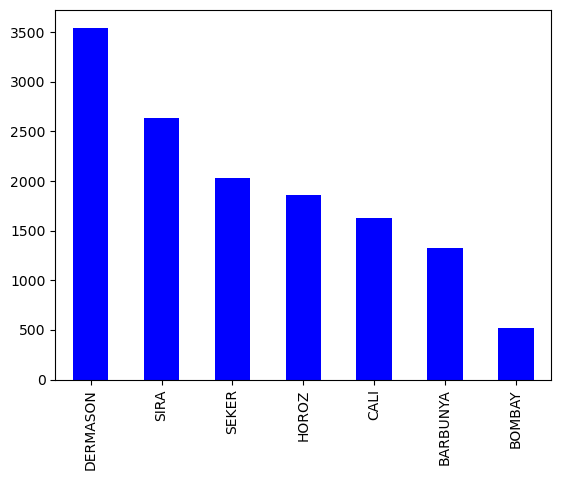

In [16]:
df["Class"].value_counts().plot(kind='bar', color='blue')
df['Class'].value_counts()

- Given the imbalanced nature of the dataset, particularly the 'BOMBAY' class, it's essential to focus on improving the classification performance for the 'SIRA' class without negatively impacting the other classes. 

###  Exploratory Data Analysis


#### plot the stripplot

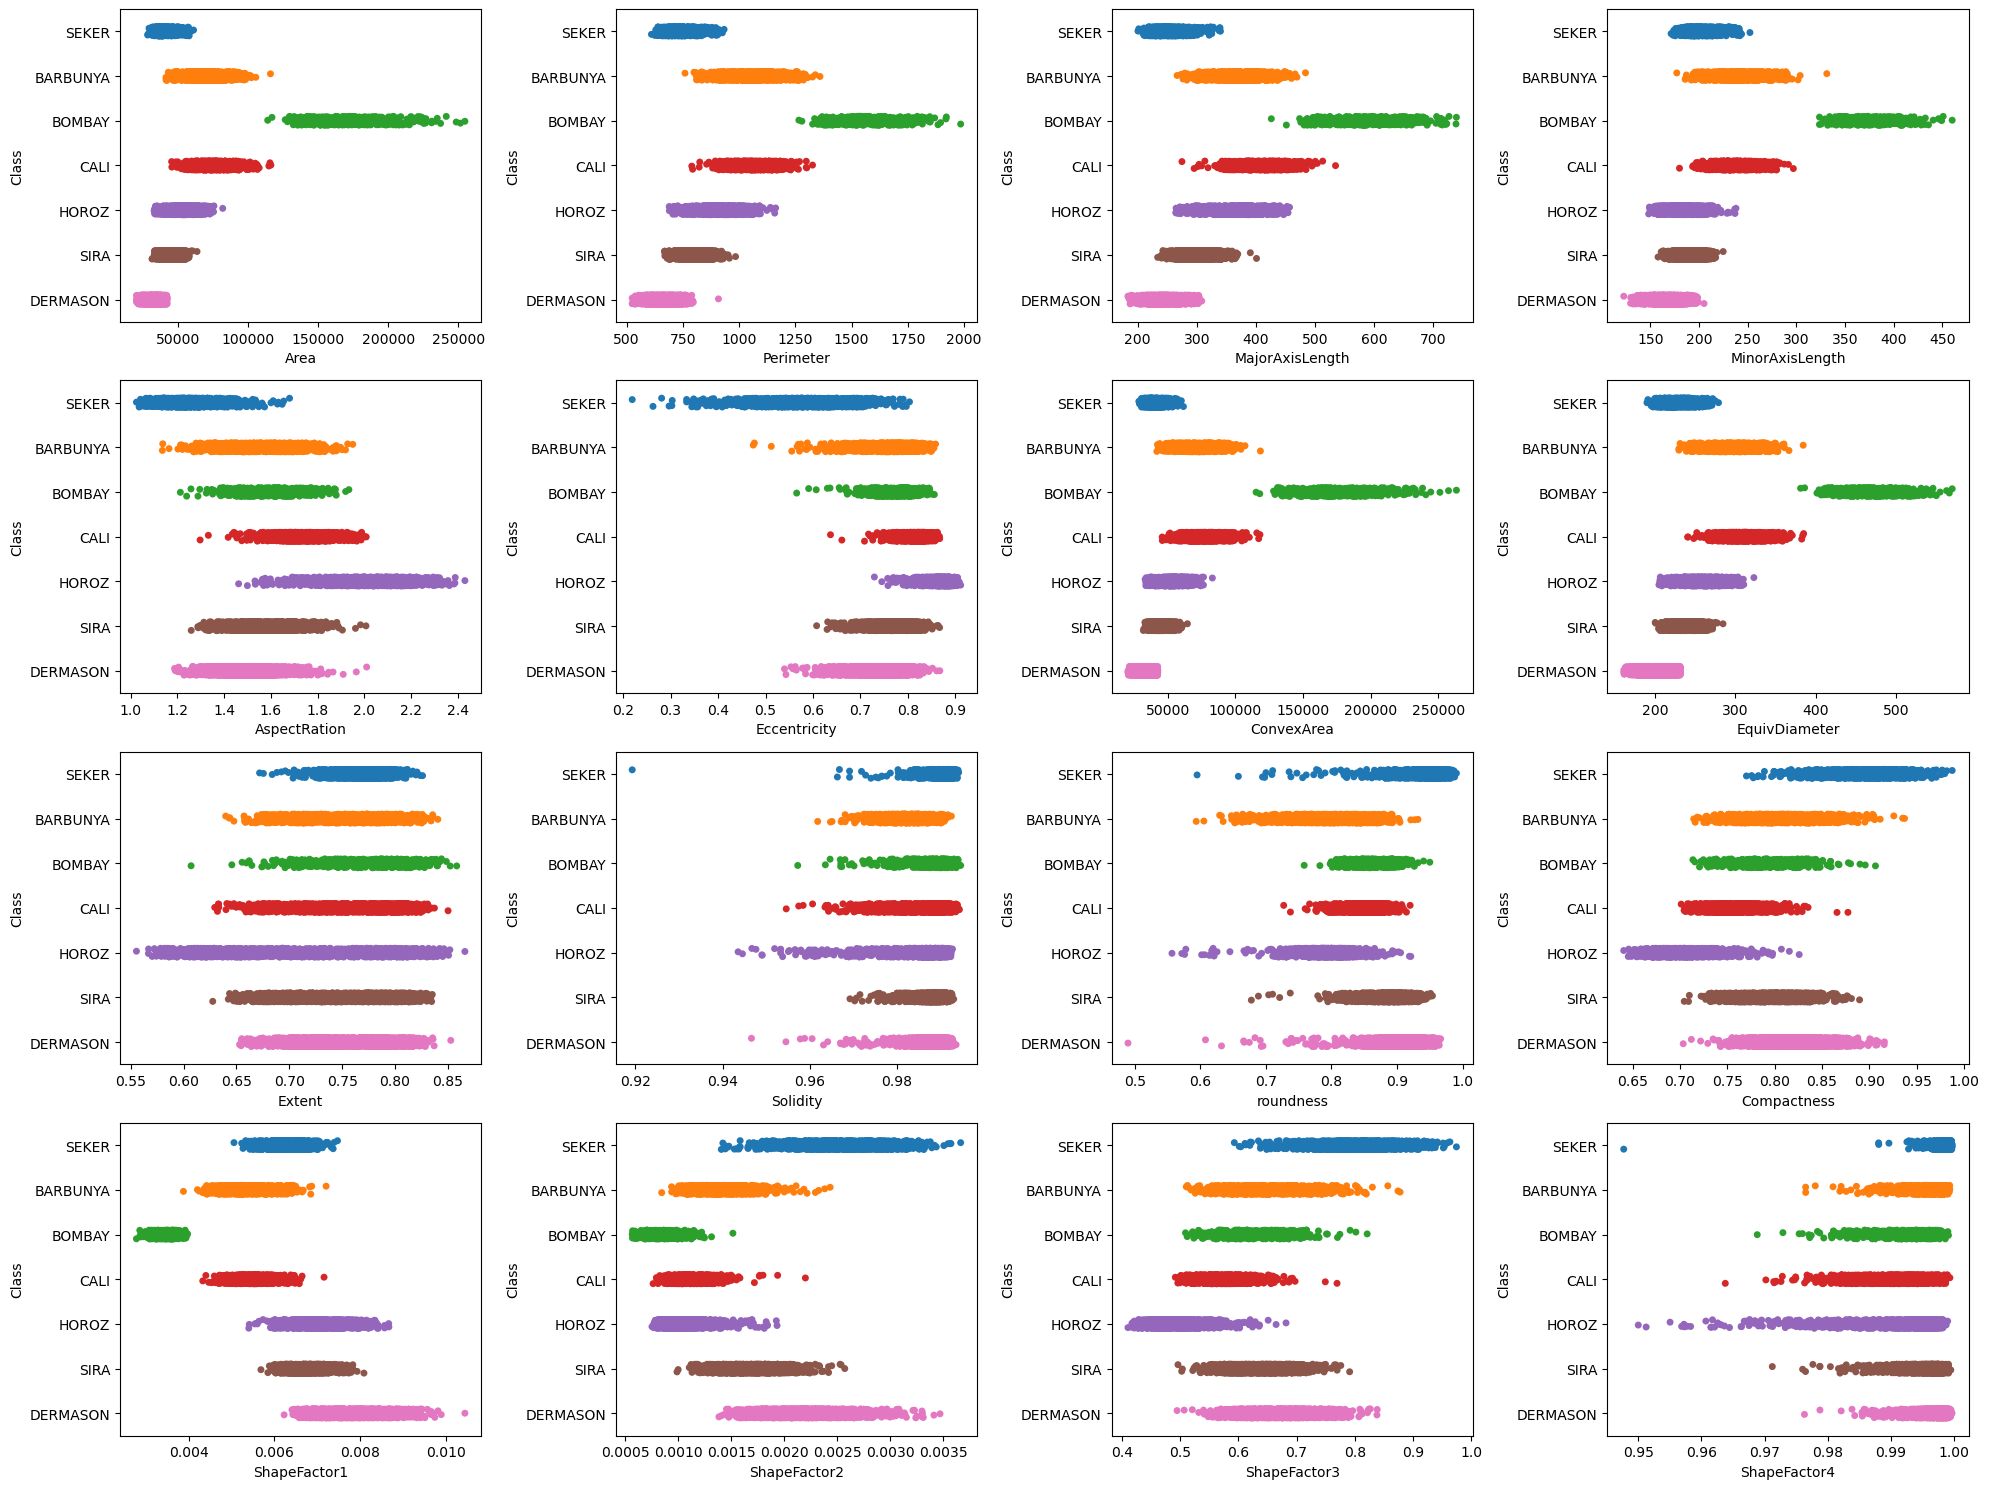

In [17]:
numerical_cols = df.drop(columns=['Class']).columns

fig, ax = plt.subplots(4, 4, figsize=(20, 15))
for variable, subplot in zip(numerical_cols, ax.flatten()):
    g=sns.stripplot(x=df[variable],y=df.Class ,ax=subplot) 
plt.tight_layout()

- There are many outliers for SIRA in the AspectRation, roundness, Compactness, ShapeFactor2-4 in the dataset

#### plot the histograms
- This helps us better visualise the frequency of values present in a column

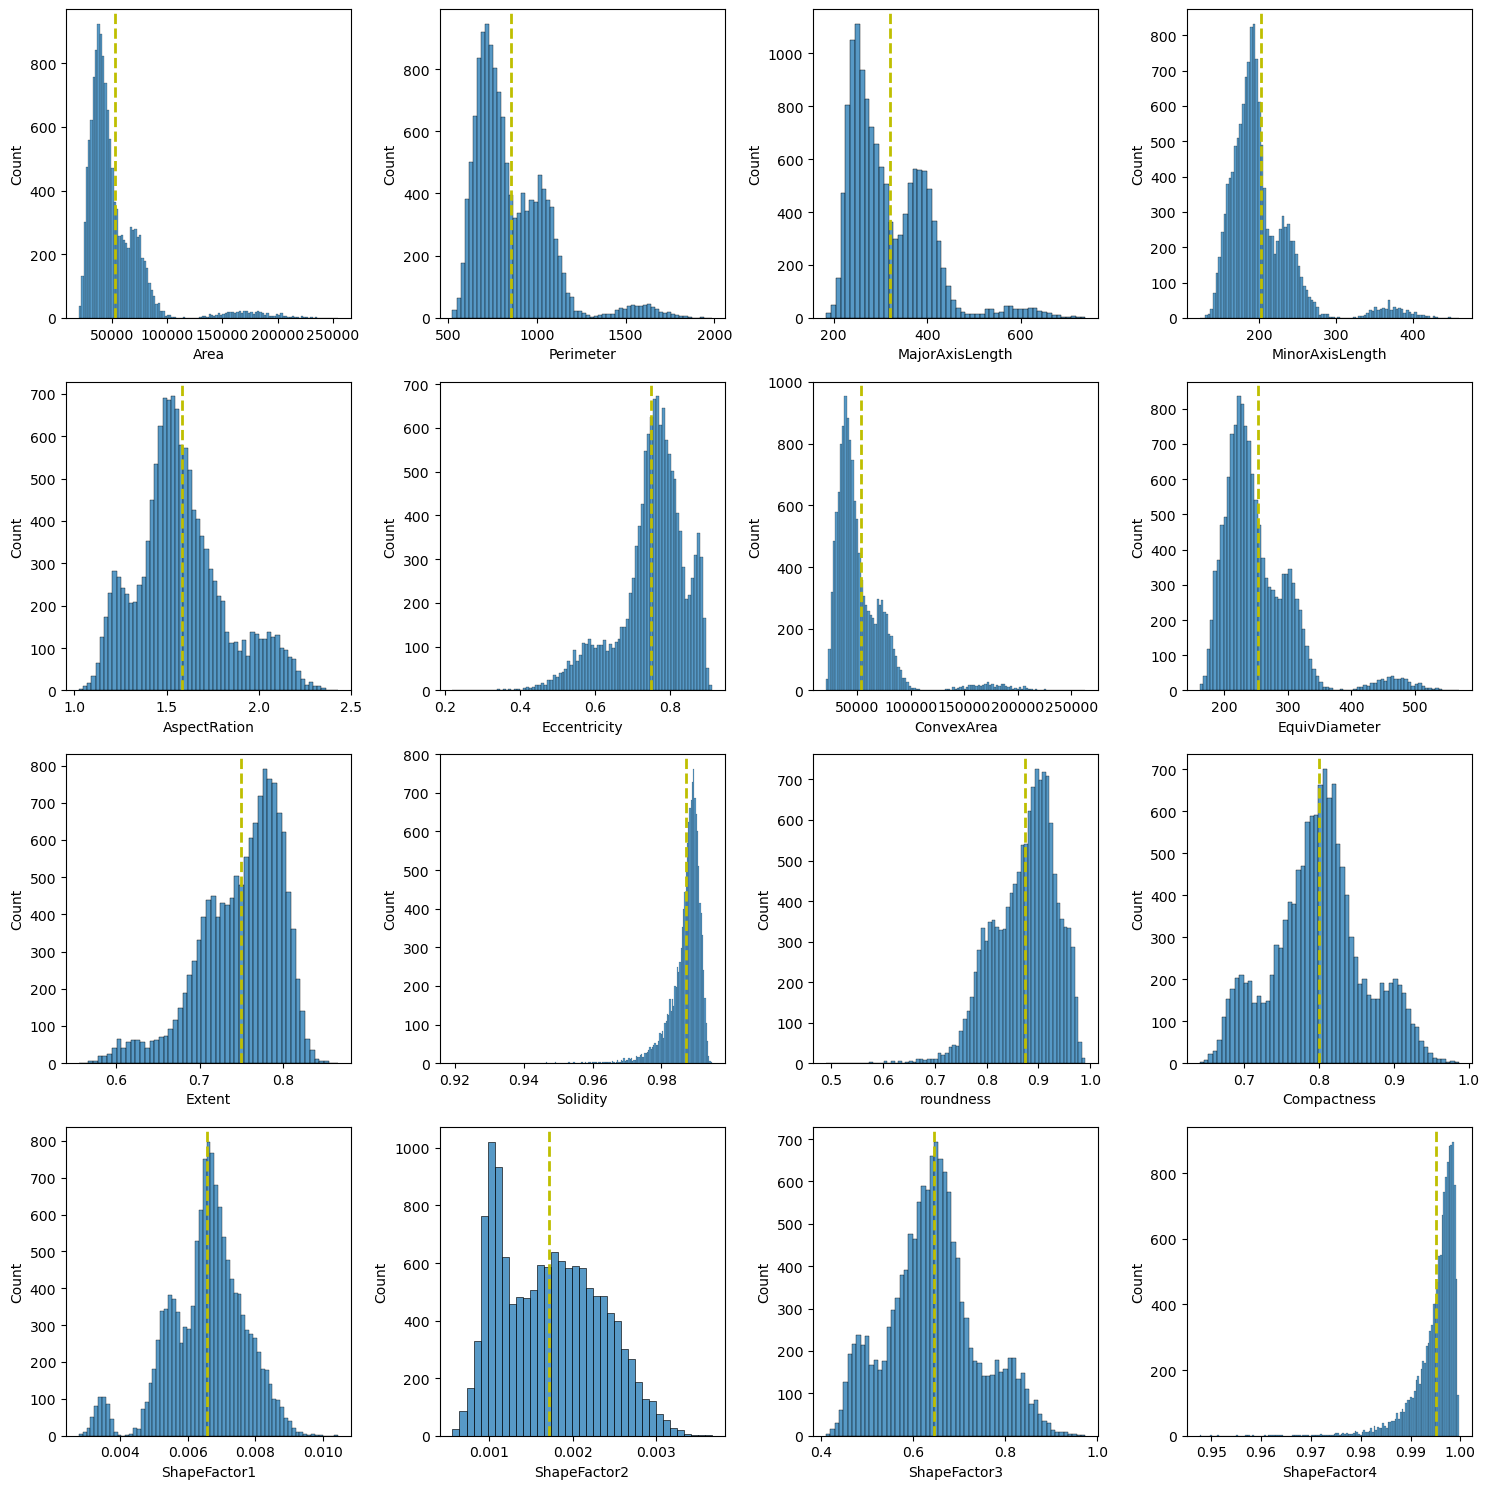

In [18]:
numerical_cols = df.drop(columns=['Class']).columns

fig, ax = plt.subplots(4, 4, figsize=(15, 15))
for variable, subplot in zip(numerical_cols, ax.flatten()):
    g=sns.histplot(data=df,x=variable ,ax=subplot) #working with default bin size
    g.axvline(x=df[variable].mean(), color='y', label='Mean', linestyle='--', linewidth=2)
plt.tight_layout()

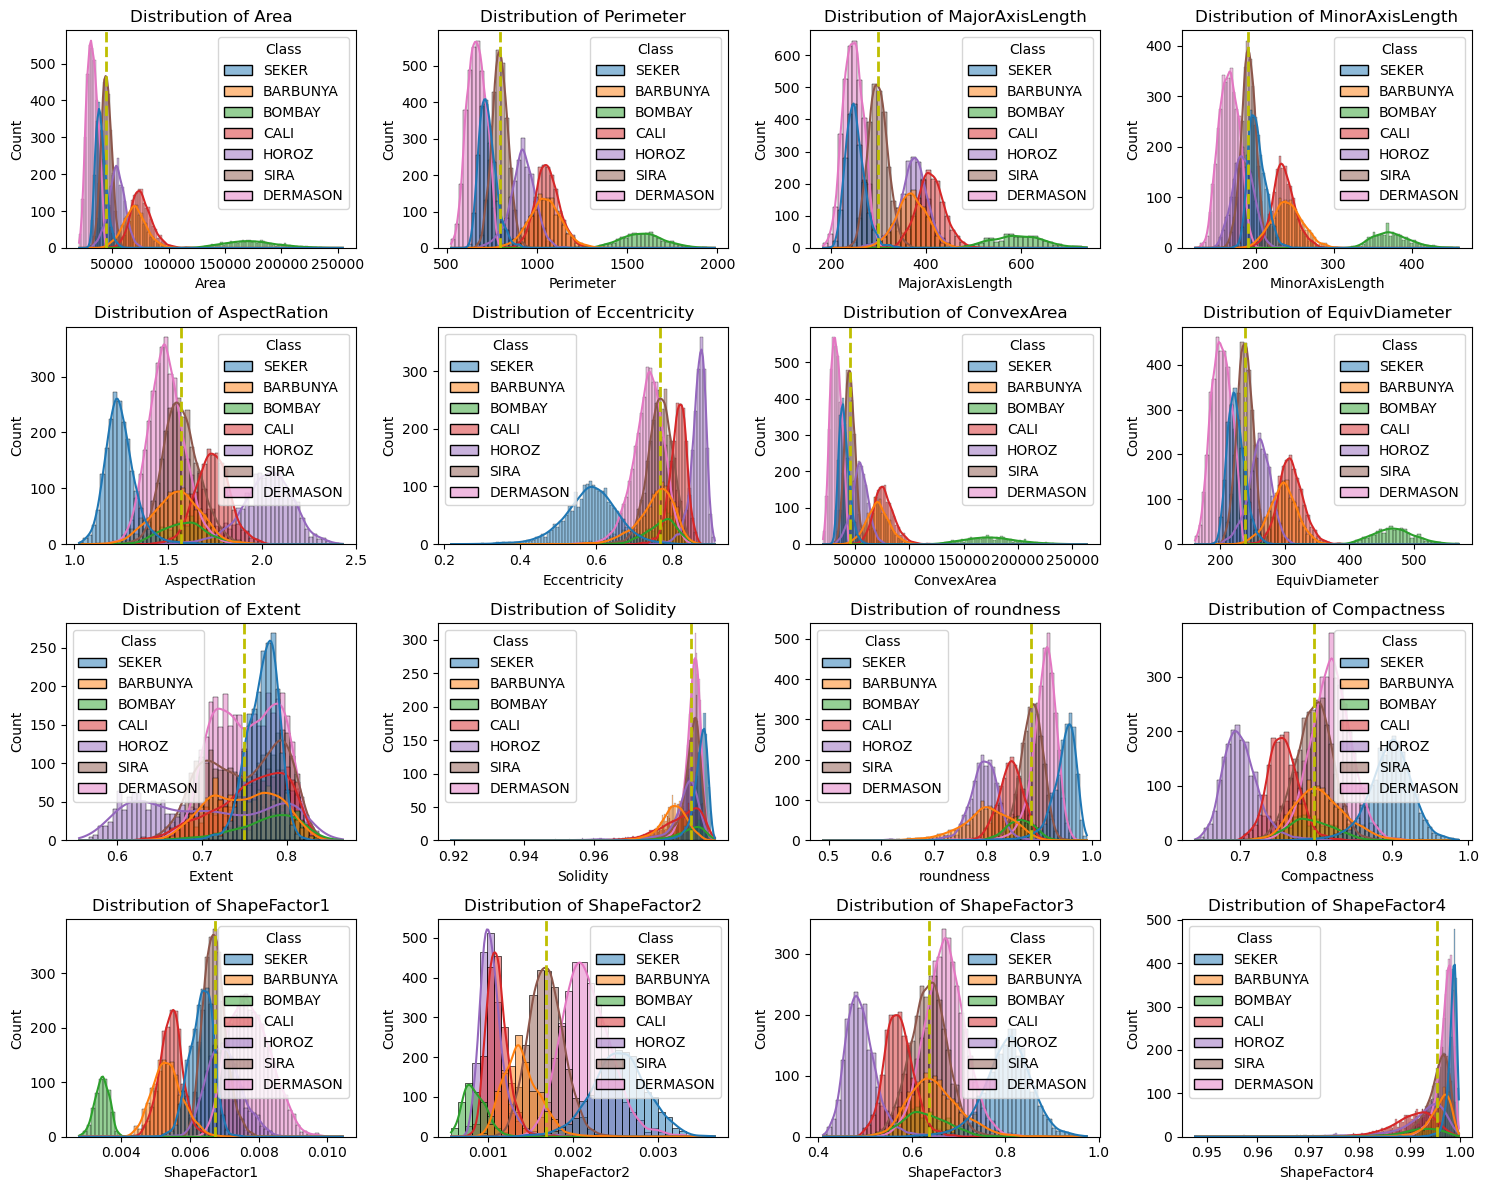

In [19]:
numerical_cols = df.drop(columns=['Class']).columns

fig, ax = plt.subplots(4, 4, figsize=(15, 12))

for variable, subplot in zip(numerical_cols, ax.flatten()):
    g = sns.histplot(data=df, x=variable, ax=subplot, hue='Class', kde=True)
    g.set_title(f'Distribution of {variable}')
    subplot.axvline(x=df[df['Class'] == 'SIRA'][variable].mean(), color='y', label='SIRA Mean', linestyle='--', linewidth=2)
    
plt.tight_layout()
plt.show()

#### boxplot

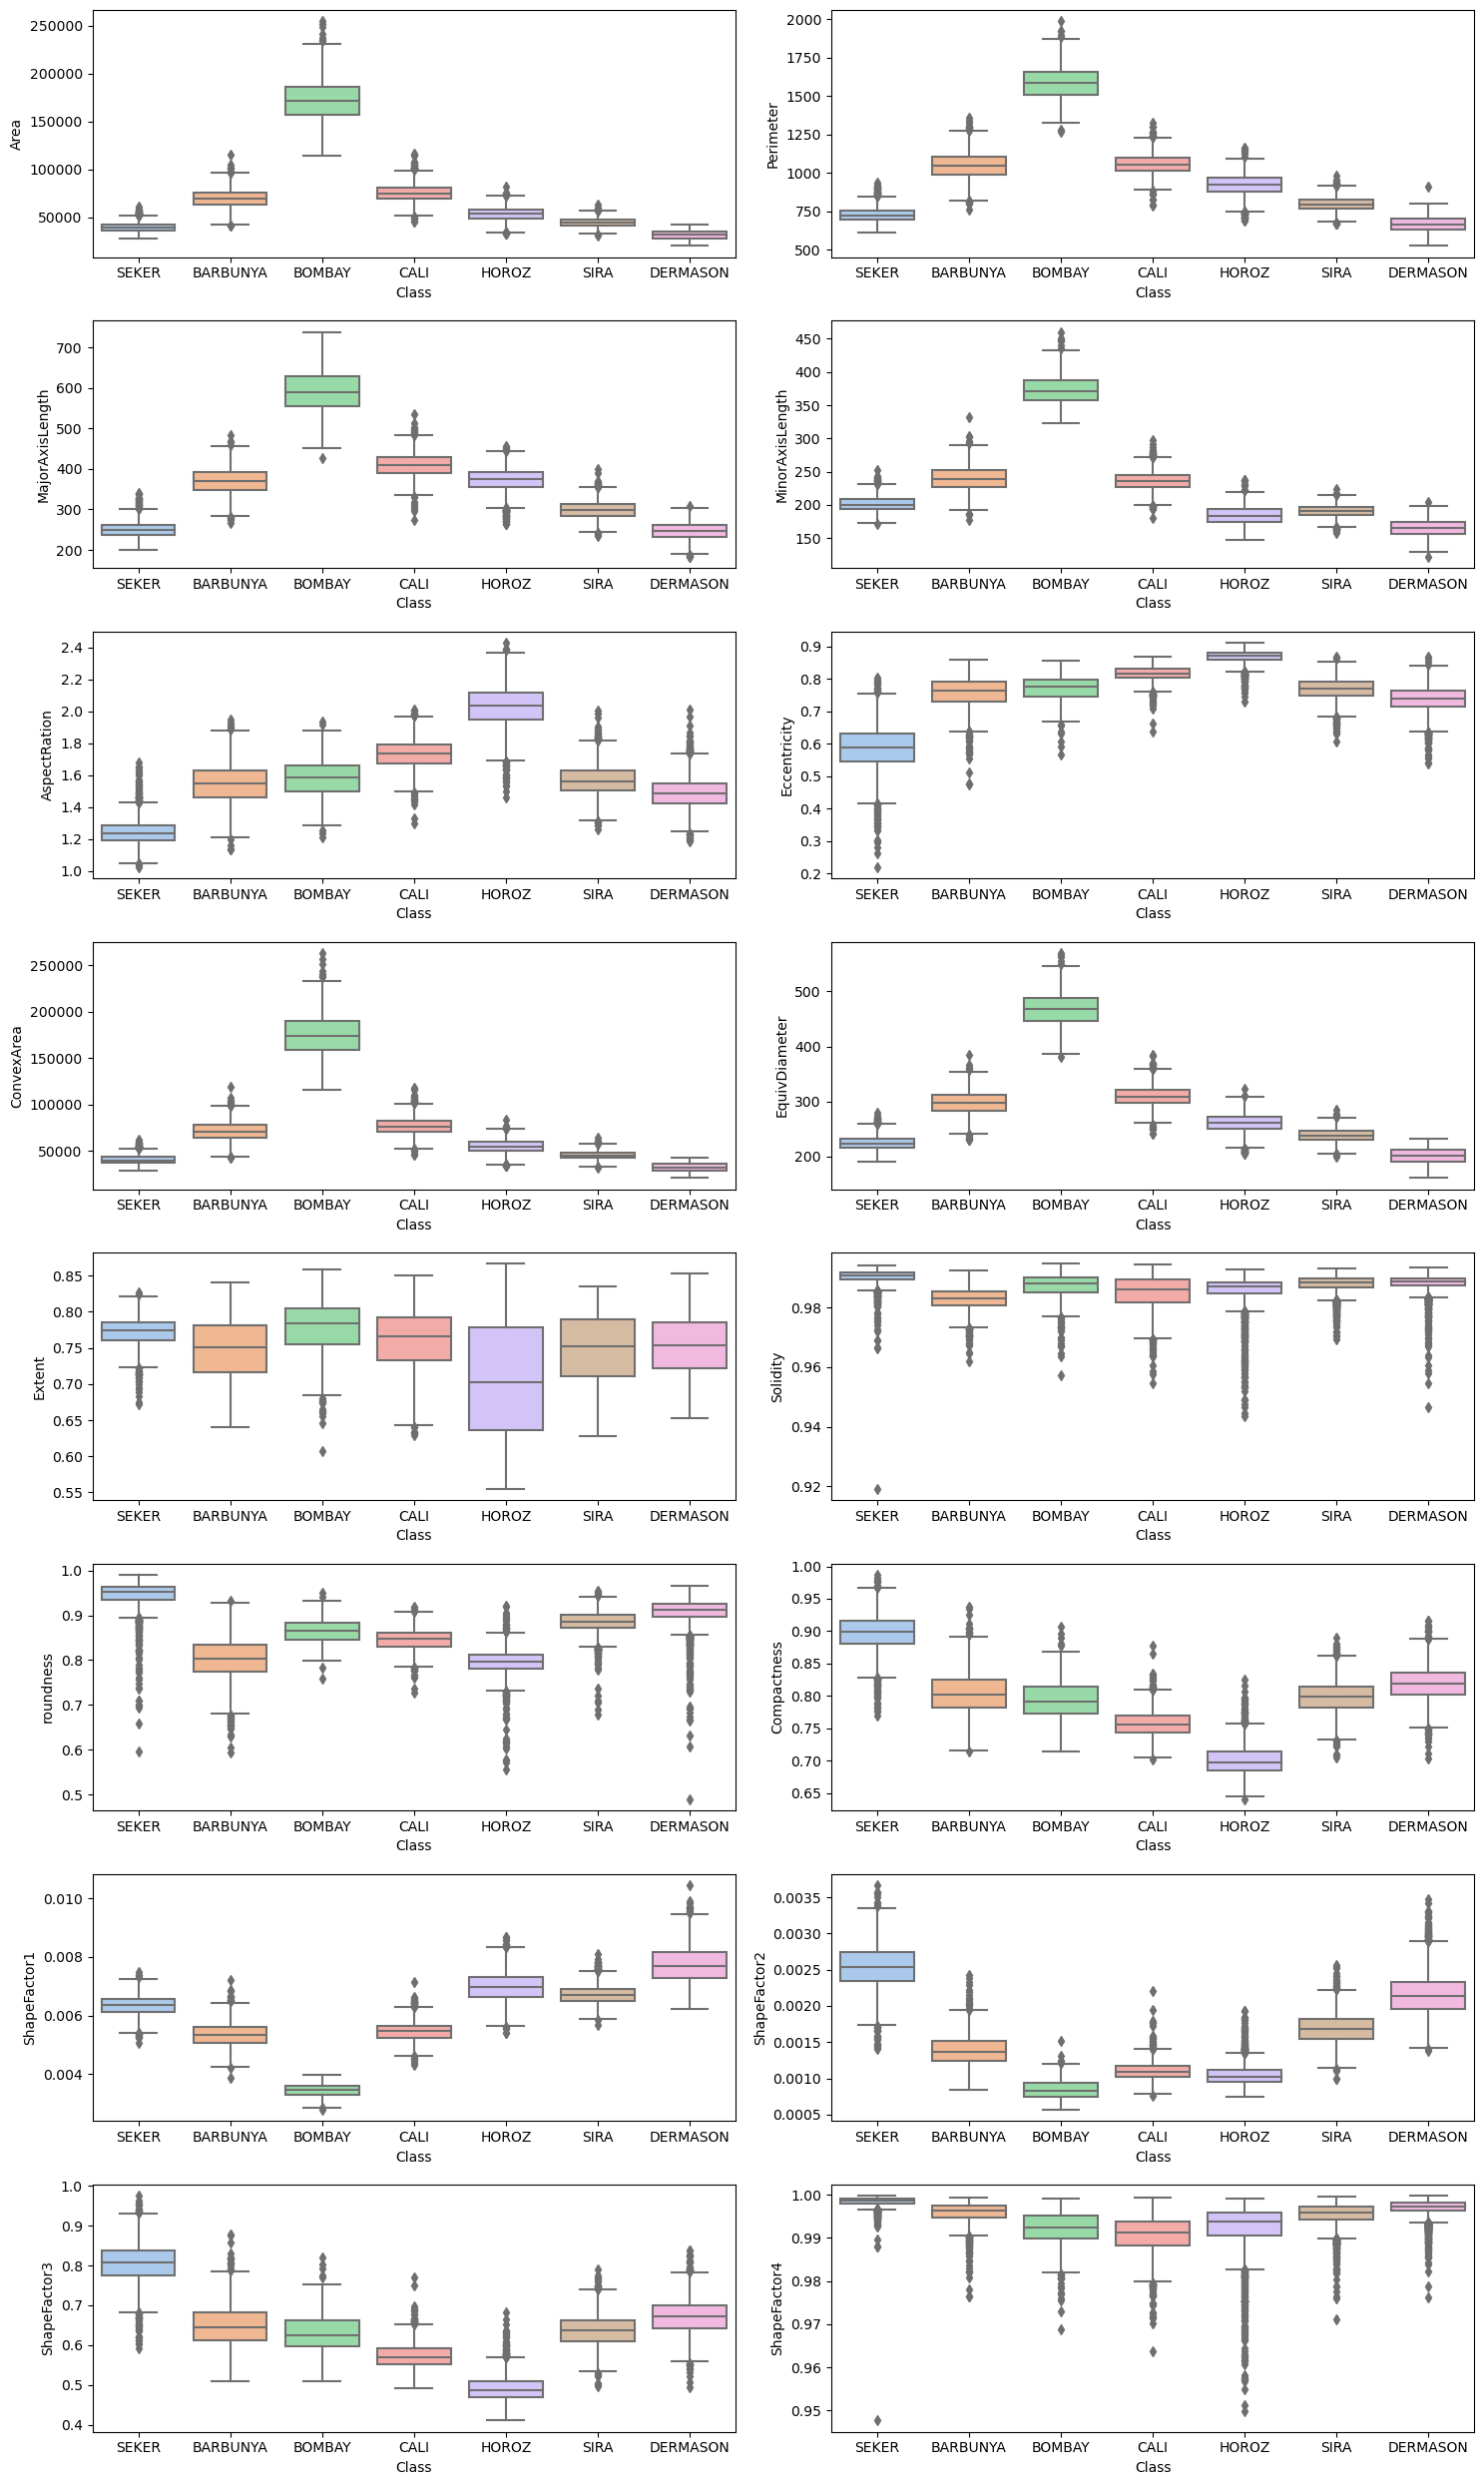

In [20]:
fig, ax = plt.subplots(8, 2, figsize=(15, 25))

for variable, subplot in zip(numerical_cols, ax.flatten()):
    sns.boxplot(x=df['Class'], y= df[variable], ax=subplot,palette='pastel')
plt.tight_layout()

- There are many outliers for SIRA in the AspectRation, MajorAxisLength, roundness, Compactness, ShapeFactor2,4 in the dataset
- use Isolation Forest algorithm to detect and replace outliers with median

In [21]:
from sklearn.ensemble import IsolationForest

sira_data = df[df['Class'] == 'SIRA']
features_to_process = ['AspectRation', 'MajorAxisLength', 'roundness', 'Compactness', 'ShapeFactor2', 'ShapeFactor4']

clf = IsolationForest(contamination=0.05, random_state=42)
clf.fit(sira_data[features_to_process])
outliers = clf.predict(sira_data[features_to_process]) == -1
for feature in features_to_process:
    median_value = sira_data[feature].median()
    sira_data.loc[outliers, feature] = median_value

In [22]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

    BARBUNYA       0.93      0.89      0.91       261
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.93      0.94      0.93       317
    DERMASON       0.89      0.93      0.91       671
       HOROZ       0.97      0.95      0.96       408
       SEKER       0.96      0.93      0.94       413
        SIRA       0.88      0.87      0.87       536

    accuracy                           0.92      2723
   macro avg       0.94      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723



- Following this data processing step, the performance of the 'SIRA' class hasn't seen a significant improvement; however, it has maintained its initial level of performance

In [23]:
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier(random_state=42)

cv_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')

for i, score in enumerate(cv_scores):
    print(f'Cross-Validation Fold {i + 1}: {score}')

average_accuracy = cv_scores.mean()
print(f'Average Accuracy: {average_accuracy}')

Cross-Validation Fold 1: 0.4652956298200514
Cross-Validation Fold 2: 0.7545922116091109
Cross-Validation Fold 3: 0.8155767817781043
Cross-Validation Fold 4: 0.6741366642174872
Cross-Validation Fold 5: 0.32549595885378396
Average Accuracy: 0.6070194492557075


In [24]:
df.replace(['SIRA','BOMBAY','DERMASON', 'BARBUNYA', 'HOROZ', 'CALI', 'SEKER',], [1,2,3,4,5,6,0], inplace=True)
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,0
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,0
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,0
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,0
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,0


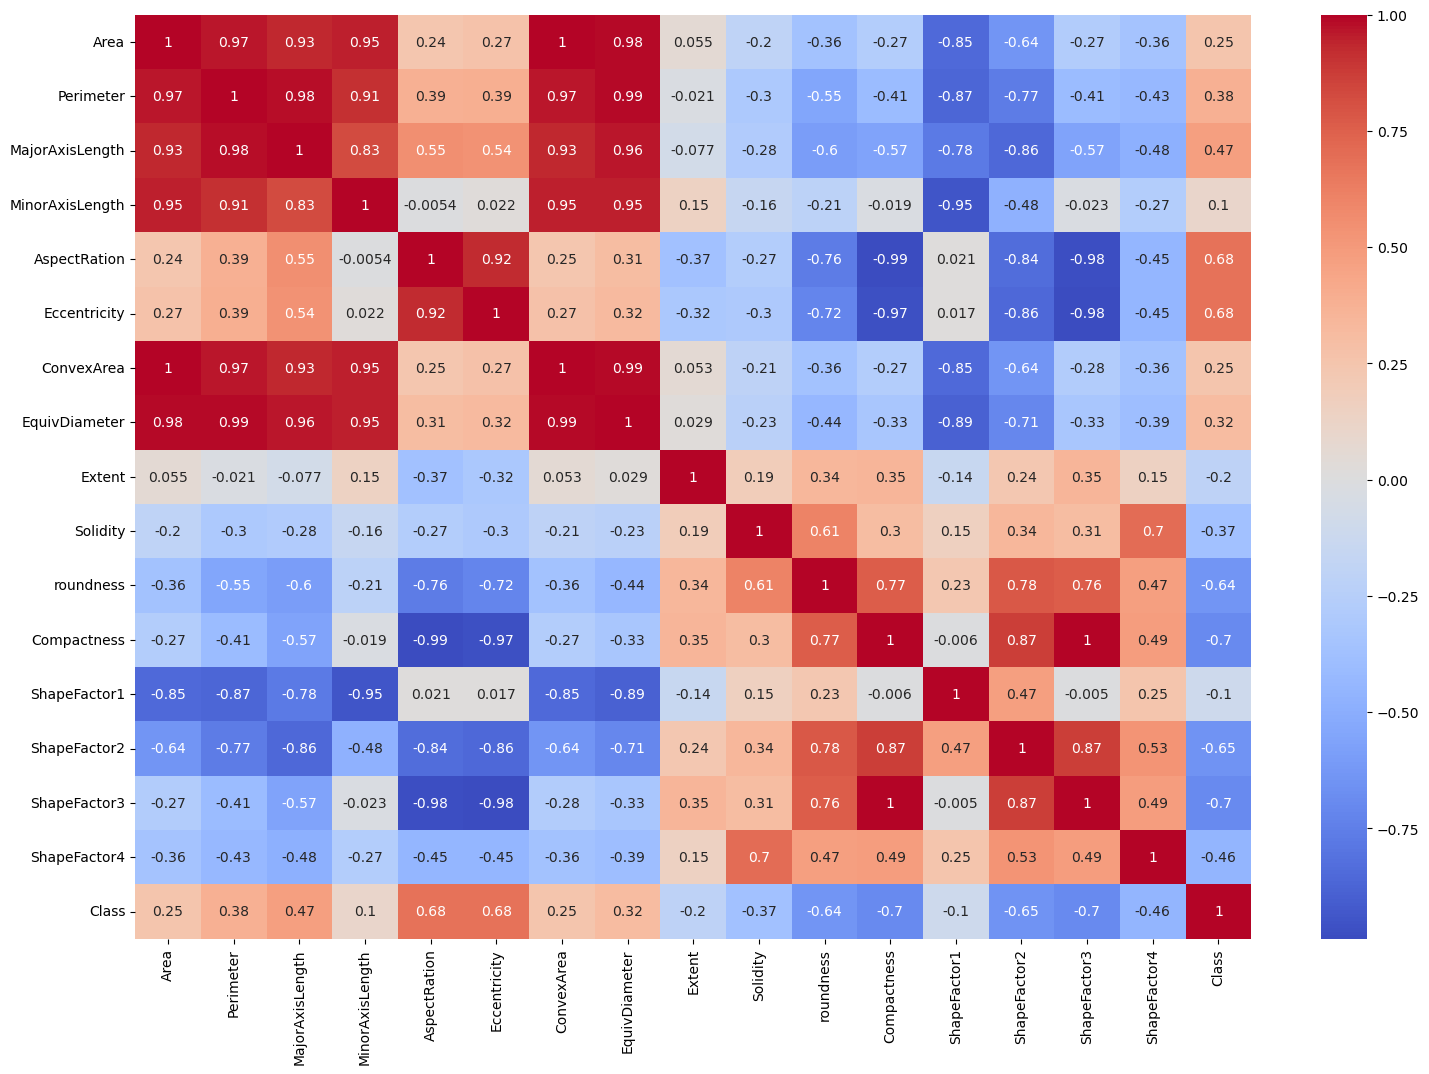

In [25]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), yticklabels='auto', annot=True, cmap='coolwarm')
plt.show()

* There a lot of highly correlated attributes in the above correlation matrix, for eg: </br>

    *   **Area & Convex Area**:1
    *   **Shaped Factor3 & Comapctness**:1
    *   **Aspect ration & compactness**: -0.99
    *   **Area & Perimeter**: 0.97
    *   **Perimeter & ShapeFactor1**: -0.87
    *   **Aspect ration & Eccentricity**: 0.92 
    
    
* Some attributes with low level of correlation among them:</br>
    *   **Extent & EquivDiameter**: 0.029
    *   **Solidity & Eccentricity**: -0.3
    *   **Compactnes & Area**: -0.27

In [26]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)

iqr = q3 - q1

df1 = df[~((df < (q1 - 1.5 * iqr)) |(df > (q3 + 1.5 * iqr))).any(axis=1)]

df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,10539.0,46988.053516,16127.410427,20420.000000,35192.000000,42722.000000,55322.000000,98270.000000
Perimeter,10539.0,811.044205,153.063406,524.736000,694.113000,774.160000,919.395500,1276.178000
MajorAxisLength,10539.0,303.509859,62.373074,183.601165,253.280692,287.415858,354.354089,483.691256
MinorAxisLength,10539.0,193.318250,28.886792,136.709958,172.719645,189.297278,207.180512,278.942451
AspectRation,10539.0,1.567089,0.196776,1.220549,1.441661,1.539949,1.667287,2.113693
Eccentricity,10539.0,0.754725,0.068557,0.573360,0.720318,0.760471,0.800167,0.881006
ConvexArea,10539.0,47575.100958,16381.635541,20684.000000,35596.000000,43194.000000,55970.000000,99879.000000
EquivDiameter,10539.0,241.241304,40.371225,161.243764,211.678638,233.228085,265.401880,353.724823
Extent,10539.0,0.751998,0.043734,0.616633,0.719947,0.758002,0.787274,0.866195
Solidity,10539.0,0.987962,0.002895,0.979182,0.986406,0.988468,0.990004,0.994260


#### Synthetic Minority Over-sampling Technique

In [28]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [29]:
clf = RandomForestClassifier(class_weight='balanced', random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [30]:
y_pred = clf.predict(X_test)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

    BARBUNYA       0.92      0.91      0.92       261
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.94      0.95      0.94       317
    DERMASON       0.91      0.91      0.91       671
       HOROZ       0.97      0.95      0.96       408
       SEKER       0.96      0.94      0.95       413
        SIRA       0.86      0.88      0.87       536

    accuracy                           0.93      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723



#### Class Weighted Random Forest model

In [31]:
class_weights = {
    'DERMASON': 1.0,
    'SIRA': 3.0,
    'SEKER': 1.0,
    'HOROZ': 1.0,
    'CALI': 1.0,
    'BARBUNYA': 1.0,
    'BOMBAY': 1.0
}

In [32]:
clf = RandomForestClassifier(class_weight=class_weights, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(class_weight={'BARBUNYA': 1.0, 'BOMBAY': 1.0,
                                     'CALI': 1.0, 'DERMASON': 1.0, 'HOROZ': 1.0,
                                     'SEKER': 1.0, 'SIRA': 3.0},
                       random_state=42)

In [33]:
y_pred = clf.predict(X_test)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

    BARBUNYA       0.91      0.90      0.91       261
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.93      0.93      0.93       317
    DERMASON       0.88      0.93      0.90       671
       HOROZ       0.97      0.95      0.96       408
       SEKER       0.96      0.93      0.94       413
        SIRA       0.88      0.86      0.87       536

    accuracy                           0.92      2723
   macro avg       0.93      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723



#### GridSearchCV tuned Random Forest model

In [34]:
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier(class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30]
}

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train_resampled, y_train_resampled)

best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

    BARBUNYA       0.92      0.92      0.92       261
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.94      0.94      0.94       317
    DERMASON       0.92      0.91      0.91       671
       HOROZ       0.97      0.95      0.96       408
       SEKER       0.97      0.94      0.95       413
        SIRA       0.86      0.90      0.88       536

    accuracy                           0.93      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723



- In GridSearchCV tuned Random Forest model, The high recall value of 0.90 for the 'SIRA' class indicates that the model is effective at correctly identifying the majority of samples belonging to the 'SIRA' class.

In summary, the GridSearchCV tuned Random Forest model generally shows slightly better performance across most classes, with improved precision, recall, and F1-scores in some cases. However, the Class Weighted model may have a slight advantage in maintaining better precision for some classes while trading off with a slight decrease in recall for the 'SIRA' class. 